In [4]:
"""Test for neoclassical transport compute functions."""

import matplotlib.pyplot as plt
import numpy as np
import pytest
from tests.test_plotting import tol_1d

from desc.examples import get


@pytest.mark.unit
def test_field_line_average():
    """Test that field line average converges to surface average."""
    # For axisymmetric devices, one toroidal transit must be exact.
    rho = np.array([1])
    alpha = np.array([0])
    eq = get("DSHAPE")
    grid = eq.get_rtz_grid(
        rho,
        alpha,
        np.linspace(0, 2 * np.pi, 20),
        coordinates="raz",
        period=(np.inf, 2 * np.pi, np.inf),
    )
    data = eq.compute(["<L|r,a>", "<G|r,a>", "V_r(r)"], grid=grid)
    np.testing.assert_allclose(
        data["<L|r,a>"] / data["<G|r,a>"], data["V_r(r)"] / (4 * np.pi**2), rtol=1e-3
    )
    assert np.all(np.sign(data["<L|r,a>"]) > 0)
    assert np.all(np.sign(data["<G|r,a>"]) > 0)

    # Otherwise, many toroidal transits are necessary to sample surface.
    eq = get("W7-X")
    grid = eq.get_rtz_grid(
        rho,
        alpha,
        np.linspace(0, 40 * np.pi, 300),
        coordinates="raz",
        period=(np.inf, 2 * np.pi, np.inf),
    )
    data = eq.compute(["<L|r,a>", "<G|r,a>", "V_r(r)"], grid=grid)
    np.testing.assert_allclose(
        data["<L|r,a>"] / data["<G|r,a>"], data["V_r(r)"] / (4 * np.pi**2), rtol=1e-3
    )
    assert np.all(np.sign(data["<L|r,a>"]) > 0)
    assert np.all(np.sign(data["<G|r,a>"]) > 0)


@pytest.mark.unit
@pytest.mark.mpl_image_compare(remove_text=True, tolerance=tol_1d)
def test_effective_ripple():
    """Test effective ripple with W7-X."""
    eq = get("W7-X")
    rho = np.linspace(0, 1, )
    grid = eq.get_rtz_grid(
        rho,
        np.array([0]),
        np.linspace(0, 20 * np.pi, 1000),
        coordinates="raz",
        period=(np.inf, 2 * np.pi, np.inf),
    )
    data = eq.compute("effective ripple", grid=grid)
    assert np.isfinite(data["effective ripple"]).all()
    fig, ax = plt.subplots()
    ax.plot(rho, grid.compress(data["effective ripple"]), marker="o")
    return fig


@pytest.mark.unit
@pytest.mark.mpl_image_compare(remove_text=True, tolerance=tol_1d)
def test_Gamma_c():
    """Test Γ_c with W7-X."""
    eq = get("W7-X")
    rho = np.linspace(0, 1, 50)
    grid = eq.get_rtz_grid(
        rho,
        np.array([0]),
        np.linspace(0, 20 * np.pi, 1000),
        coordinates="raz",
        period=(np.inf, 2 * np.pi, np.inf),
    )
    data = eq.compute("Gamma_c", grid=grid)
    assert np.isfinite(data["Gamma_c"]).all()
    
    fig, ax = plt.subplots()
    ax.plot(rho, grid.compress(data["Gamma_c"]))
    ax.set_xlabel('Radial Coordinate (rho)')
    ax.set_ylabel('Γ_c')
    ax.set_title('Γ_c vs. Radial Coordinate')
    ax.grid(True)
    
    return fig



In [5]:
#test_field_line_average()

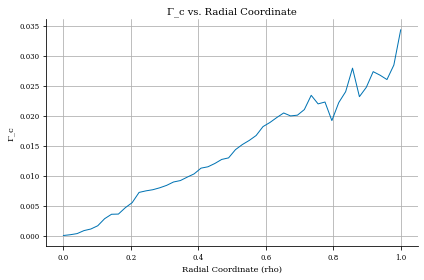

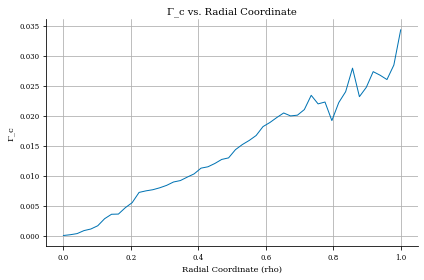

In [6]:
test_Gamma_c()